In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics

# import accuracy score function
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

function

In [ ]:
# # tn, fp, fn, tp = each_index(cm)
def each_index(metrix):
    TN = metrix[0][0]
    FP = metrix[0][1]
    FN = metrix[1][0]
    TP = metrix[1][1]
    return TN, FP, FN, TP

In [ ]:
def sensitivity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate sensitivity
    sensitivity = TP / (TP + FN) * 100
    print("Sensitivity: %.2f%%" % sensitivity)
    return sensitivity

In [ ]:
def specificity(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate specificity
    specificity = TN / (TN + FP) * 100
    print("Specificity: %.2f%%" % specificity)
    return specificity

In [ ]:
def accuracy(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) *100
    print("Accuracy: %.2f%%" % accuracy)
    return accuracy

In [ ]:
def precision(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate accuracy
    precision = (TP / (TP + FP)) *100
    print("Precision: %.2f%%" % precision)
    return precision

In [ ]:
def f1(metrix):
    TN, FP, FN, TP = each_index(metrix)
    # Calculate f1
    recall = sensitivity(metrix)
    pre = precision(metrix)
    f1 = ((2*pre*recall) / (pre+recall))
    print("F1: %.2f%%" % f1)
    return f1

## split1

training set

In [ ]:
train_data = pd.read_csv("oversampled_train_split1.csv")
train_data.shape

(518, 32)

In [ ]:
x_train = train_data[train_data.columns[2:]]
x_train.shape

(518, 30)

In [ ]:
y_train = train_data[train_data.columns[1]]
#y_train.shape
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

['B' 'M']


Testing set

In [ ]:
test_data = pd.read_csv("test.csv")
test_data.shape

(114, 33)

In [ ]:
x_test = test_data[test_data.columns[3:]] #5fold new use3
x_test.shape

(114, 30)

In [ ]:
y_test = test_data[test_data.columns[2]] #5fold new use2
#y_test.shape
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

['B' 'M']


Validation set

In [ ]:
val_data = pd.read_csv("val_split1.csv")
val_data.shape

(91, 32)

In [ ]:
x_val = val_data[val_data.columns[2:]]
x_val.shape

(91, 30)

In [ ]:
y_val = val_data[val_data.columns[1]]
#y_val.shape
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

['B' 'M']


step train

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (518, 30)
Shape of test set: (114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)
X_val = ss.fit_transform(x_val)

 หาparameter

In [ ]:
# instantiate classifier ,ยกตัวอย่างclassifier 
#rf_classifier = RandomForestClassifier(random_state=42, n_estimators=10)

In [ ]:
# give to GridSearchCV
#param_dist = {'max_depth': [2, 3, 4],
#             'bootstrap': [True, False],
#              'max_features': ['auto', 'sqrt', 'log2', None],
#              'criterion': ['gini', 'entropy']}

# set up the GridSearch
#cv_rf = GridSearchCV(rf_classifier, cv = 5,param_grid=param_dist,n_jobs = 3)

# fit the GridSearch
#cv_rf.fit(X_train, y_train)
#cv_rf.fit(X_val, y_val) #ใช้อันนี้
#print('Best Parameters using grid search: \n', cv_rf.best_params_)

#print('Best criterion parameter:', cv_rf.best_params_['criterion'])
#print('Best max_depth parameter:', cv_rf.best_params_['max_depth'])
#print('Best bootstrap parameter:', cv_rf.best_params_['bootstrap'])
#print('Best max_features parameter:', cv_rf.best_params_['max_features'])
#print('Best score:', cv_rf.best_score_)


In [ ]:
# Set best parameters given by grid search 
#rf_classifier.set_params(criterion = 'entropy',
 #                 max_features = 'auto', 3
#                max_depth = 3, 
#            )

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto'}
Best criterion parameter: entropy
Best max_depth parameter: 3
Best bootstrap parameter: False
Best max_features parameter: auto

**Best score: 0.9456140350877194**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 4, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train) # map

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test) 

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9942084942084942
0.9298245614035088


In [ ]:
from sklearn.metrics import confusion_matrix
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [ 8 60]]


In [ ]:
from sklearn.metrics import classification_report
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        46
           1       1.00      0.88      0.94        68

    accuracy                           0.93       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.93      0.93       114



validate set

In [ ]:
y_pred_val = rand_clf.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

Confusion Matrix
----------------
[[47  5]
 [ 1 38]] 

----------------


In [ ]:
# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

Sensitivity: 97.44%
Specificity: 90.38%
Accuracy: 93.41%
Precision: 88.37%
Sensitivity: 97.44%
Precision: 88.37%
F1: 92.68%


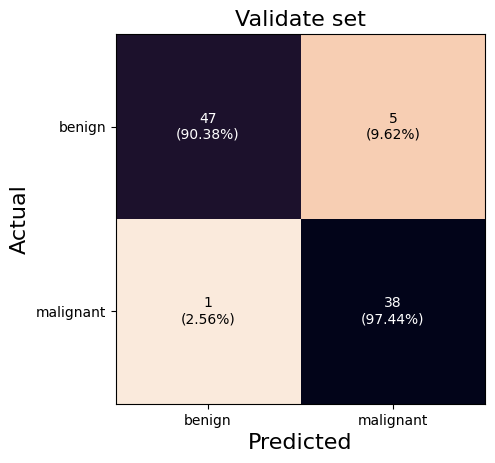

In [ ]:
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

test set

In [ ]:
y_pred_test = rand_clf.predict(X_test)
# Confusion matrix
cm_test_split1 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split1,'\n')
print('-'*16)

Confusion Matrix
----------------
[[46  0]
 [ 8 60]] 

----------------


In [ ]:
# Calculate score
sen_test_split1 = sensitivity(cm_test_split1)
spec_test_split1 = specificity(cm_test_split1)
acc_test_split1 = accuracy(cm_test_split1)
pre_test_split1 = precision(cm_test_split1)
f1_test_split1 = f1(cm_test_split1)

Sensitivity: 88.24%
Specificity: 100.00%
Accuracy: 92.98%
Precision: 100.00%
Sensitivity: 88.24%
Precision: 100.00%
F1: 93.75%


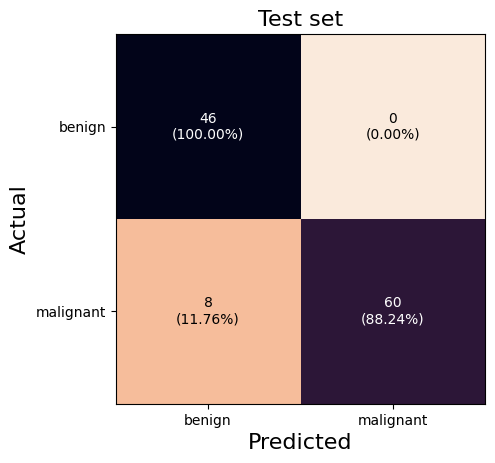

In [ ]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test_split1.astype('float') / cm_test_split1.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test_split1[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

plot ROC curve

In [ ]:
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split1 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split1)

---------------------------------------
AUC validate: 0.9391
AUC test: 0.9412


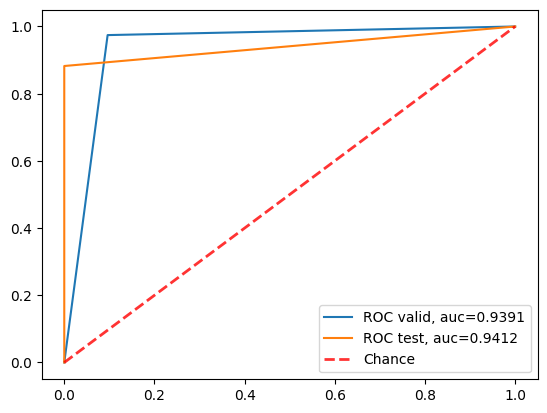

In [ ]:
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split1))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()

## Split2

Training set

In [ ]:
train_data = pd.read_csv("oversampled_train_split2.csv")
train_data.shape

(516, 32)

In [ ]:
x_train = train_data[train_data.columns[2:]]
x_train.shape

(516, 30)

In [ ]:
y_train = train_data[train_data.columns[1]]
#y_train.shape
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

['B' 'M']


Testing set

In [ ]:
test_data = pd.read_csv("test.csv")
test_data.shape

(114, 33)

In [ ]:
x_test = test_data[test_data.columns[3:]]
x_test.shape

(114, 30)

In [ ]:
y_test = test_data[test_data.columns[2]]
#y_test.shape
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

['B' 'M']


Validation set

In [ ]:
val_data = pd.read_csv("val_split2.csv")
val_data.shape

(91, 32)

In [ ]:
x_val = val_data[val_data.columns[2:]]
x_val.shape

(91, 30)

In [ ]:
y_val = val_data[val_data.columns[1]]
#y_val.shape
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

['B' 'M']


step train -split2

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy() 

In [ ]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (516, 30)
Shape of test set: (114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)
X_val = ss.fit_transform(x_val) 

หาparameter

In [ ]:
# instantiate classifier ,ยกตัวอย่างclassifier 
#rf_classifier = RandomForestClassifier(random_state=42, n_estimators=10)

In [ ]:
# give to GridSearchCV
#param_dist = {'max_depth': [2, 3, 4],
#             'bootstrap': [True, False],
#              'max_features': ['auto', 'sqrt', 'log2', None],
#              'criterion': ['gini', 'entropy']}

# set up the GridSearch
#cv_rf = GridSearchCV(rf_classifier, cv = 5,param_grid=param_dist,n_jobs = 3)

# fit the GridSearch
#cv_rf.fit(X_train, y_train)
#cv_rf.fit(X_val, y_val) #ใช้อันนี้
#print('Best Parameters using grid search: \n', cv_rf.best_params_)

#print('Best criterion parameter:', cv_rf.best_params_['criterion'])
#print('Best max_depth parameter:', cv_rf.best_params_['max_depth'])
#print('Best bootstrap parameter:', cv_rf.best_params_['bootstrap'])
#print('Best max_features parameter:', cv_rf.best_params_['max_features'])
#print('Best score:', cv_rf.best_score_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2'}
Best criterion parameter: entropy
Best max_depth parameter: 4
Best bootstrap parameter: False
Best max_features parameter: log2

**Best score: 0.9783625730994151**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 4, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train) # map

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9961240310077519
0.9035087719298246


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [11 57]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        46
           1       1.00      0.84      0.91        68

    accuracy                           0.90       114
   macro avg       0.90      0.92      0.90       114
weighted avg       0.92      0.90      0.90       114



validate set

In [ ]:
y_pred_val = rand_clf.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

Confusion Matrix
----------------
[[53  0]
 [ 0 38]] 

----------------


In [ ]:
 # Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

Sensitivity: 100.00%
Specificity: 100.00%
Accuracy: 100.00%
Precision: 100.00%
Sensitivity: 100.00%
Precision: 100.00%
F1: 100.00%


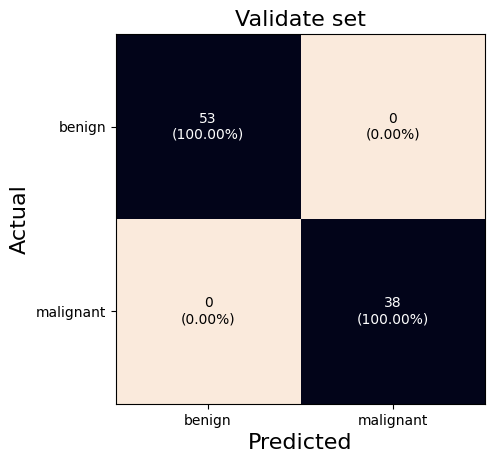

In [ ]:
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

test set

In [ ]:
y_pred_test = rand_clf.predict(X_test)
# Confusion matrix
cm_test_split2 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split2,'\n')
print('-'*16)

Confusion Matrix
----------------
[[46  0]
 [11 57]] 

----------------


In [ ]:
# Calculate score
sen_test_split2 = sensitivity(cm_test_split2)
spec_test_split2 = specificity(cm_test_split2)
acc_test_split2 = accuracy(cm_test_split2)
pre_test_split2 = precision(cm_test_split2)
f1_test_split2 = f1(cm_test_split2)

Sensitivity: 83.82%
Specificity: 100.00%
Accuracy: 90.35%
Precision: 100.00%
Sensitivity: 83.82%
Precision: 100.00%
F1: 91.20%


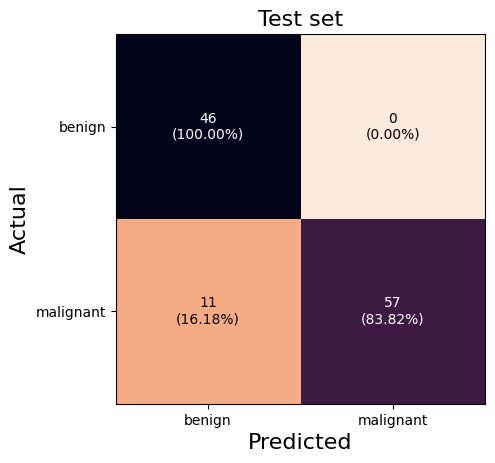

In [ ]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test_split2.astype('float') / cm_test_split2.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test_split2[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

plot ROC curve

In [ ]:
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split2 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split2)

---------------------------------------
AUC validate: 1.0000
AUC test: 0.9191


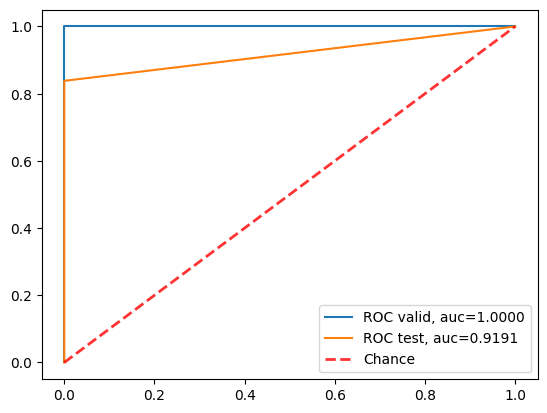

In [ ]:
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split2))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()

## split3

Training set

In [ ]:
train_data = pd.read_csv("oversampled_train_split3.csv")
train_data.shape

(490, 32)

In [ ]:
x_train = train_data[train_data.columns[2:]]
x_train.shape

(490, 30)

In [ ]:
y_train = train_data[train_data.columns[1]]
#y_train.shape
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

['B' 'M']


Testing set

In [ ]:
test_data = pd.read_csv("test.csv")
test_data.shape

(114, 33)

In [ ]:
x_test = test_data[test_data.columns[3:]]
x_test.shape

(114, 30)

In [ ]:
y_test = test_data[test_data.columns[2]]
#y_test.shape
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

['B' 'M']


Validation set

In [ ]:
val_data = pd.read_csv("val_split3.csv")
val_data.shape

(91, 32)

In [ ]:
x_val = val_data[val_data.columns[2:]]
x_val.shape

(91, 30)

In [ ]:
y_val = val_data[val_data.columns[1]]
#y_val.shape
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

['B' 'M']


step train- split3

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()  # เพิ่ม

In [ ]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (490, 30)
Shape of test set: (114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)
X_val = ss.fit_transform(x_val)   # เพิ่ม

param

In [ ]:
# instantiate classifier ,ยกตัวอย่างclassifier 
#rf_classifier = RandomForestClassifier(random_state=42, n_estimators=10)

In [ ]:
# give to GridSearchCV
#param_dist = {'max_depth': [2, 3, 4],
#             'bootstrap': [True, False],
#              'max_features': ['auto', 'sqrt', 'log2', None],
#              'criterion': ['gini', 'entropy']}

# set up the GridSearch
#cv_rf = GridSearchCV(rf_classifier, cv = 5,param_grid=param_dist,n_jobs = 3)

# fit the GridSearch
#cv_rf.fit(X_train, y_train)
#cv_rf.fit(X_val, y_val) #ใช้อันนี้
#print('Best Parameters using grid search: \n', cv_rf.best_params_)

#print('Best criterion parameter:', cv_rf.best_params_['criterion'])
#print('Best max_depth parameter:', cv_rf.best_params_['max_depth'])
#print('Best bootstrap parameter:', cv_rf.best_params_['bootstrap'])
#print('Best max_features parameter:', cv_rf.best_params_['max_features'])
#print('Best score:', cv_rf.best_score_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2'}
Best criterion parameter: gini
Best max_depth parameter: 2
Best bootstrap parameter: True
Best max_features parameter: log2

**Best score: 0.967251461988304**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 4, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train) # map

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9918367346938776
0.9122807017543859


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))


[[46  0]
 [10 58]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        46
           1       1.00      0.85      0.92        68

    accuracy                           0.91       114
   macro avg       0.91      0.93      0.91       114
weighted avg       0.93      0.91      0.91       114



validate set

In [ ]:
y_pred_val = rand_clf.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)


Confusion Matrix
----------------
[[58  8]
 [ 1 24]] 

----------------


In [ ]:
 # Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

Sensitivity: 96.00%
Specificity: 87.88%
Accuracy: 90.11%
Precision: 75.00%
Sensitivity: 96.00%
Precision: 75.00%
F1: 84.21%


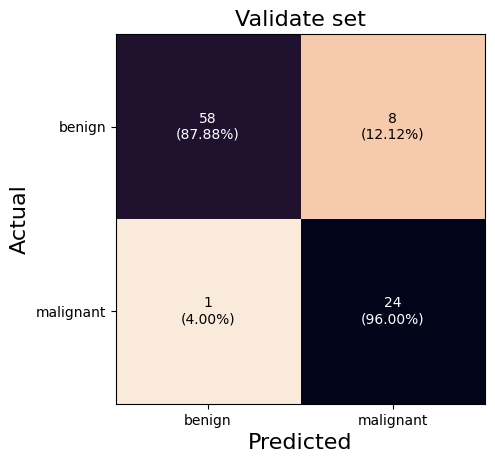

In [ ]:
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

test set

In [ ]:
y_pred_test = rand_clf.predict(X_test)
# Confusion matrix
cm_test_split3 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split3,'\n')
print('-'*16)

Confusion Matrix
----------------
[[46  0]
 [10 58]] 

----------------


In [ ]:
# Calculate score
sen_test_split3 = sensitivity(cm_test_split3)
spec_test_split3 = specificity(cm_test_split3)
acc_test_split3 = accuracy(cm_test_split3)
pre_test_split3 = precision(cm_test_split3)
f1_test_split3 = f1(cm_test_split3)

Sensitivity: 85.29%
Specificity: 100.00%
Accuracy: 91.23%
Precision: 100.00%
Sensitivity: 85.29%
Precision: 100.00%
F1: 92.06%


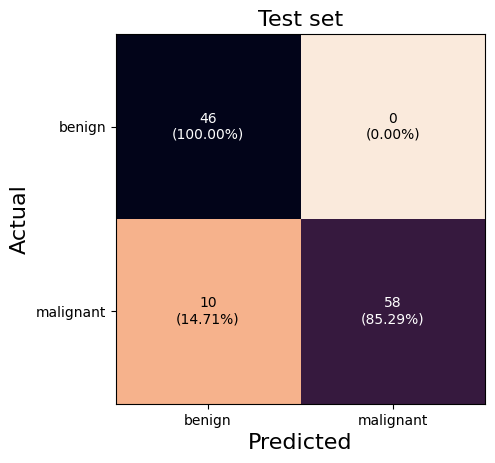

In [ ]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test_split3.astype('float') / cm_test_split3.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test_split3[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

plot ROC curve

In [ ]:
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split3 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split3)

---------------------------------------
AUC validate: 0.9194
AUC test: 0.9265


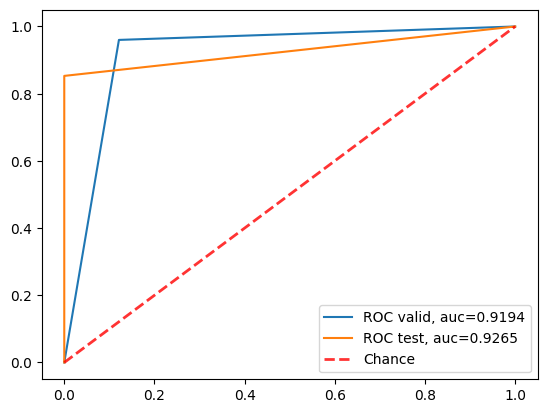

In [ ]:
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split3))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()

## split4

Training set

In [ ]:
train_data = pd.read_csv("oversampled_train_split4.csv")
train_data.shape

(478, 32)

In [ ]:
x_train = train_data[train_data.columns[2:]]
x_train.shape

(478, 30)

In [ ]:
y_train = train_data[train_data.columns[1]]
#y_train.shape
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

['B' 'M']


Testing set



In [ ]:
test_data = pd.read_csv("test.csv")
test_data.shape

(114, 33)

In [ ]:
x_test = test_data[test_data.columns[3:]]
x_test.shape

(114, 30)

In [ ]:
y_test = test_data[test_data.columns[2]]
#y_test.shape
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

['B' 'M']


Validation set

In [ ]:
val_data = pd.read_csv("val_split4.csv")
val_data.shape

(91, 32)

In [ ]:
x_val = val_data[val_data.columns[2:]]
x_val.shape

(91, 30)

In [ ]:
y_val = val_data[val_data.columns[1]]
#y_val.shape
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

['B' 'M']


step train - split4

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (478, 30)
Shape of test set: (114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)
X_val = ss.fit_transform(x_val)

param

In [ ]:
# instantiate classifier ,ยกตัวอย่างclassifier 
#rf_classifier = RandomForestClassifier(random_state=42, n_estimators=10)

In [ ]:
# give to GridSearchCV
#param_dist = {'max_depth': [2, 3, 4],
#             'bootstrap': [True, False],
#              'max_features': ['auto', 'sqrt', 'log2', None],
#              'criterion': ['gini', 'entropy']}

# set up the GridSearch
#cv_rf = GridSearchCV(rf_classifier, cv = 5,param_grid=param_dist,n_jobs = 3)

# fit the GridSearch
#cv_rf.fit(X_train, y_train)
#cv_rf.fit(X_val, y_val) #ใช้อันนี้
#print('Best Parameters using grid search: \n', cv_rf.best_params_)

#print('Best criterion parameter:', cv_rf.best_params_['criterion'])
#print('Best max_depth parameter:', cv_rf.best_params_['max_depth'])
#print('Best bootstrap parameter:', cv_rf.best_params_['bootstrap'])
#print('Best max_features parameter:', cv_rf.best_params_['max_features'])
#print('Best score:', cv_rf.best_score_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto'}
Best criterion parameter: gini
Best max_depth parameter: 2
Best bootstrap parameter: True
Best max_features parameter: auto

**Best score: 0.9666666666666666**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 4, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train) # map

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9916317991631799
0.9385964912280702


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [ 7 61]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        46
           1       1.00      0.90      0.95        68

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.95      0.94      0.94       114



validate set

In [ ]:
y_pred_val = rand_clf.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

Confusion Matrix
----------------
[[58 14]
 [ 0 19]] 

----------------


In [ ]:
# Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

Sensitivity: 100.00%
Specificity: 80.56%
Accuracy: 84.62%
Precision: 57.58%
Sensitivity: 100.00%
Precision: 57.58%
F1: 73.08%


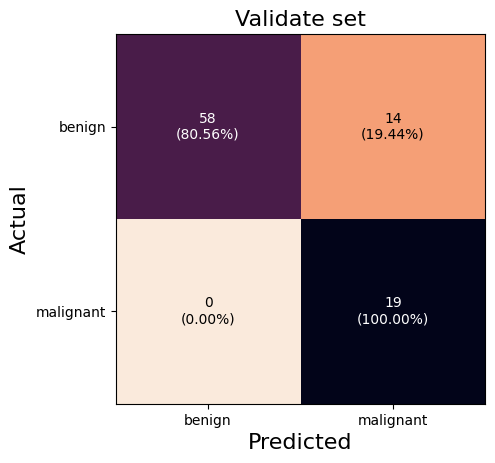

In [ ]:
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

test set

In [ ]:
y_pred_test = rand_clf.predict(X_test)
# Confusion matrix
cm_test_split4 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split4,'\n')
print('-'*16)

Confusion Matrix
----------------
[[46  0]
 [ 7 61]] 

----------------


In [ ]:
# Calculate score
sen_test_split4 = sensitivity(cm_test_split4)
spec_test_split4 = specificity(cm_test_split4)
acc_test_split4 = accuracy(cm_test_split4)
pre_test_split4 = precision(cm_test_split4)
f1_test_split4 = f1(cm_test_split4)

Sensitivity: 89.71%
Specificity: 100.00%
Accuracy: 93.86%
Precision: 100.00%
Sensitivity: 89.71%
Precision: 100.00%
F1: 94.57%


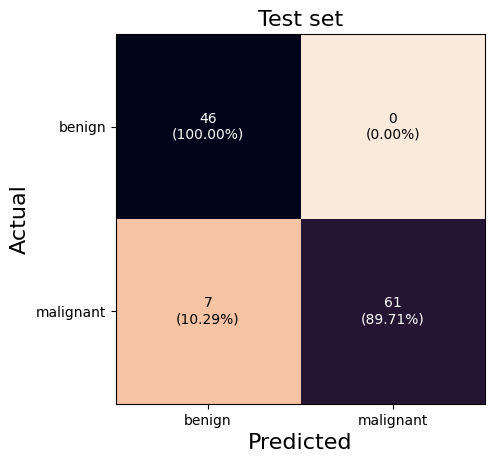

In [ ]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test_split4.astype('float') / cm_test_split4.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test_split4[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

plot ROC curve

In [ ]:
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split4 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split4)

---------------------------------------
AUC validate: 0.9028
AUC test: 0.9485


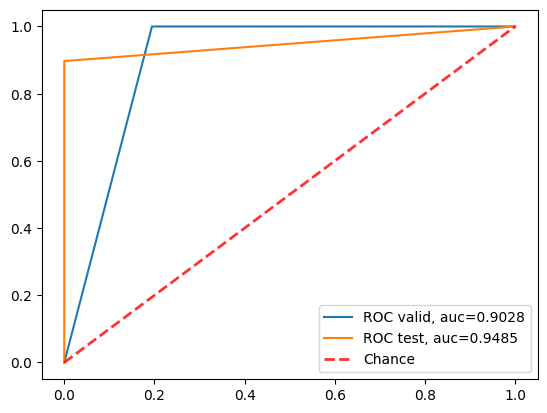

In [ ]:
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split4))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()

## split5

Training set

In [ ]:
train_data = pd.read_csv("oversampled_train_split5.csv")
train_data.shape

(486, 32)

In [ ]:
x_train = train_data[train_data.columns[2:]]
x_train.shape

(486, 30)

In [ ]:
y_train = train_data[train_data.columns[1]]
#y_train.shape
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
print(le.classes_)

['B' 'M']


Testing set

In [ ]:
test_data = pd.read_csv("test.csv")
test_data.shape

(114, 33)

In [ ]:
x_test = test_data[test_data.columns[3:]]
x_test.shape

(114, 30)

In [ ]:
y_test = test_data[test_data.columns[2]]
#y_test.shape
le = LabelEncoder()
y_test = np.array(le.fit_transform(y_test))
print(le.classes_)

['B' 'M']


Validation set

In [ ]:
val_data = pd.read_csv("val_split5.csv")
val_data.shape

(91, 32)

In [ ]:
x_val = val_data[val_data.columns[2:]]
x_val.shape

(91, 30)

In [ ]:
y_val = val_data[val_data.columns[1]]
#y_val.shape
le = LabelEncoder()
y_val = np.array(le.fit_transform(y_val))
print(le.classes_)

['B' 'M']


step train -split5

In [ ]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
x_val = x_val.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

print("Shape of training set:", x_train.shape)
print("Shape of test set:", x_test.shape)

Shape of training set: (486, 30)
Shape of test set: (114, 30)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)
X_val = ss.fit_transform(x_val)

param

In [ ]:
# instantiate classifier ,ยกตัวอย่างclassifier 

#rf_classifier = RandomForestClassifier(random_state=42, n_estimators=10)

In [ ]:
# give to GridSearchCV
#param_dist = {'max_depth': [2, 3, 4],
#             'bootstrap': [True, False],
#              'max_features': ['auto', 'sqrt', 'log2', None],
#              'criterion': ['gini', 'entropy']}

# set up the GridSearch
#cv_rf = GridSearchCV(rf_classifier, cv = 5,param_grid=param_dist,n_jobs = 3)

# fit the GridSearch
#cv_rf.fit(X_train, y_train)
#cv_rf.fit(X_val, y_val) #ใช้อันนี้
#print('Best Parameters using grid search: \n', cv_rf.best_params_)

#print('Best criterion parameter:', cv_rf.best_params_['criterion'])
#print('Best max_depth parameter:', cv_rf.best_params_['max_depth'])
#print('Best bootstrap parameter:', cv_rf.best_params_['bootstrap'])
#print('Best max_features parameter:', cv_rf.best_params_['max_features'])
#print('Best score:', cv_rf.best_score_)

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}
Best criterion parameter: gini
Best max_depth parameter: 4
Best bootstrap parameter: False
Best max_features parameter: log2

**Best score: 0.967251461988304** 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 4, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train) # map

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0])

In [ ]:
# accuracy score

print(accuracy_score(y_train, rand_clf.predict(X_train)))

ran_clf_acc = accuracy_score(y_test, y_pred)
print(ran_clf_acc)

0.9794238683127572
0.9122807017543859


In [ ]:
# confusion matrix

print(confusion_matrix(y_test, y_pred))

[[46  0]
 [10 58]]


In [ ]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90        46
           1       1.00      0.85      0.92        68

    accuracy                           0.91       114
   macro avg       0.91      0.93      0.91       114
weighted avg       0.93      0.91      0.91       114



validate set

In [ ]:
y_pred_val = rand_clf.predict(X_val)
cm_val = confusion_matrix(y_val, y_pred_val)
print('Confusion Matrix')
print('-'*16)
print(cm_val,'\n')
print('-'*16)

Confusion Matrix
----------------
[[55 13]
 [ 0 23]] 

----------------


In [ ]:
 # Calculate score
sen_val = sensitivity(cm_val)
spec_val = specificity(cm_val)
acc_val = accuracy(cm_val)
pre_val = precision(cm_val)
f1_val = f1(cm_val)

Sensitivity: 100.00%
Specificity: 80.88%
Accuracy: 85.71%
Precision: 63.89%
Sensitivity: 100.00%
Precision: 63.89%
F1: 77.97%


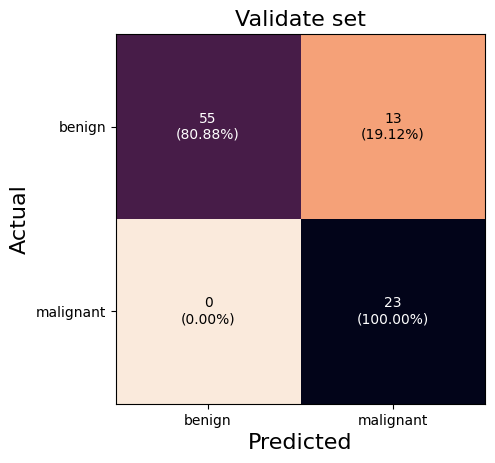

In [ ]:
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_val = cm_val.astype('float') / cm_val.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_val, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_val.shape[1]),
       yticks=np.arange(cm_norm_val.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Validate set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_val.max() / 2.
for i in range(cm_norm_val.shape[0]):
    for j in range(cm_norm_val.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], cm_norm_val[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_val[i, j] > thresh else "black")
# Show plot
plt.show()

test set

In [ ]:
y_pred_test = rand_clf.predict(X_test)
# Confusion matrix
cm_test_split5 = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix')
print('-'*16)
print(cm_test_split5,'\n')
print('-'*16)

Confusion Matrix
----------------
[[46  0]
 [10 58]] 

----------------


In [ ]:
# Calculate score
sen_test_split5 = sensitivity(cm_test_split5)
spec_test_split5 = specificity(cm_test_split5)
acc_test_split5 = accuracy(cm_test_split5)
pre_test_split5 = precision(cm_test_split5)
f1_test_split5 = f1(cm_test_split5)

Sensitivity: 85.29%
Specificity: 100.00%
Accuracy: 91.23%
Precision: 100.00%
Sensitivity: 85.29%
Precision: 100.00%
F1: 92.06%


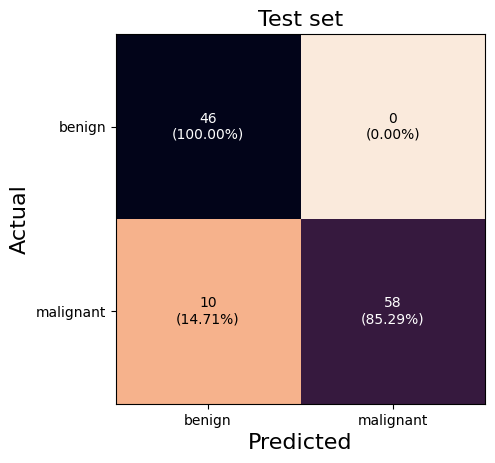

In [ ]:
# plot confusion matrix
class_names = ['benign','malignant']
# Normalize confusion matrix to percentage
cm_norm_test = cm_test_split5.astype('float') / cm_test_split5.sum(axis=1)[:, np.newaxis]
# Create plot
fig, ax = plt.subplots()
im = ax.imshow(cm_norm_test, interpolation='nearest', cmap="rocket_r")
ax.grid(False)
# Add labels
ax.set(xticks=np.arange(cm_norm_test.shape[1]),
       yticks=np.arange(cm_norm_test.shape[0]),
       xticklabels=class_names, yticklabels=class_names)
ax.set_title("Test set", fontsize=16)
ax.set_ylabel('Actual', fontsize=16)
ax.set_xlabel('Predicted', fontsize=16)
# Add percentage and count values inside plot
thresh = cm_norm_test.max() / 2.
for i in range(cm_norm_test.shape[0]):
    for j in range(cm_norm_test.shape[1]):
        ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_test_split5[i,j], cm_norm_test[i, j]*100),
                ha="center", va="center",
                color="white" if cm_norm_test[i, j] > thresh else "black")
# Show plot
plt.show()

plot ROC curve

In [ ]:
fpr1, tpr1, thr1 = roc_curve(y_val, y_pred_val)
auc_val = roc_auc_score(y_val, y_pred_val)
fpr2, tpr2, thr2 = roc_curve(y_test, y_pred_test)
auc_test_split5 = roc_auc_score(y_test, y_pred_test)

print("---------------------------------------")
print("AUC validate: %.4f" % auc_val)
print("AUC test: %.4f" % auc_test_split5)

---------------------------------------
AUC validate: 0.9044
AUC test: 0.9265


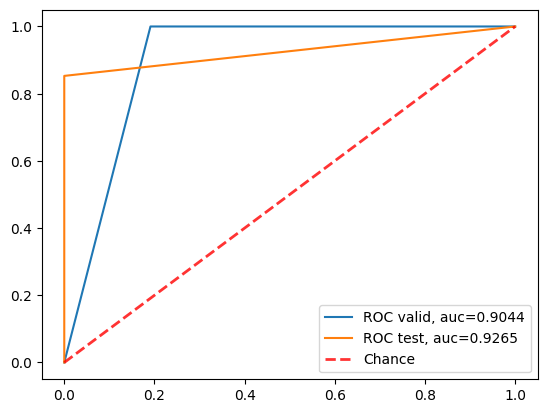

In [ ]:
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc),color='red')
plt.plot(fpr1,tpr1,label="ROC valid, auc="+str("%.4f" % auc_val))
plt.plot(fpr2,tpr2,label="ROC test, auc="+str("%.4f" % auc_test_split5))
plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)
plt.legend(loc=4)
plt.show()

# Compare

In [ ]:
test_split1 = np.array([[45, 1], [14, 54]])
test_split2 = np.array([[46, 0], [15, 53]])
test_split3 = np.array([[45, 1], [17, 51]])
test_split4 = np.array([[46, 0], [16, 52]])
test_split5 = np.array([[45, 1], [13, 55]])

In [ ]:
# test_split5

In [ ]:
overall_test = test_split1 + test_split2 + test_split3 + test_split4 + test_split5
overall_test

array([[227,   3],
       [ 75, 265]])

In [ ]:
 overall_cm_test = cm_test_split1 + cm_test_split2 + cm_test_split3 + cm_test_split4 + cm_test_split5
 overall_cm_test

array([[230,   0],
       [ 46, 294]])

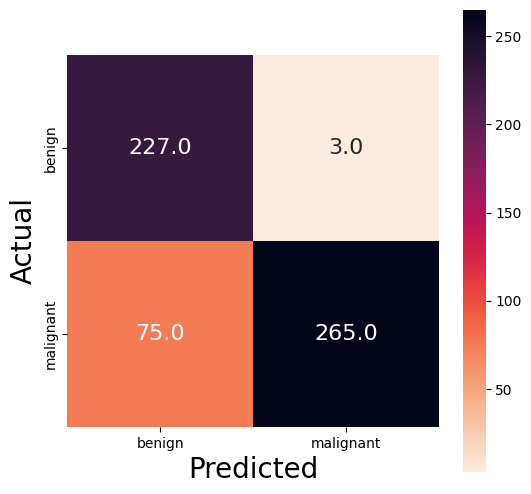

In [ ]:
label = ['benign','malignant']
plt.figure(figsize=(6, 6))
# ax = sns.heatmap(cmn, cmap="rocket_r", fmt=".4f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax = sns.heatmap(overall_test, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)
# Show plot
plt.show()

# # plot confusion matrix
# class_names = ['benign','malignant']
# # Normalize confusion matrix to percentage
# overall_test_val = overall_test.astype('float') / overall_test.sum(axis=1)[:, np.newaxis]
# # Create plot
# fig, ax = plt.subplots()
# im = ax.imshow(overall_test_val, interpolation='nearest', cmap="rocket_r")
# ax.grid(False)
# # Add labels
# ax.set(xticks=np.arange(overall_test_val.shape[1]),
#        yticks=np.arange(overall_test_val.shape[0]),
#        xticklabels=class_names, yticklabels=class_names)
# ax.set_title("Validate set", fontsize=16)
# ax.set_ylabel('Actual', fontsize=16)
# ax.set_xlabel('Predicted', fontsize=16)
# # Add percentage and count values inside plot
# thresh = overall_test_val.max() / 2.
# for i in range(overall_test_val.shape[0]):
#     for j in range(overall_test_val.shape[1]):
#         ax.text(j, i, '''{}\n({:.2f}%)'''.format(cm_val[i,j], overall_test_val[i, j]*100),
#                 ha="center", va="center",
#                 color="white" if overall_test_val[i, j] > thresh else "black")
# # Show plot
# plt.show()

In [ ]:
 sen_split1 = sensitivity(cm_test_split1)
 sen_split2 = sensitivity(cm_test_split2)
 sen_split3 = sensitivity(cm_test_split3)
 sen_split4 = sensitivity(cm_test_split4)
 sen_split5 = sensitivity(cm_test_split5)
 sen_overall = sensitivity(overall_cm_test)

Sensitivity: 88.24%
Sensitivity: 83.82%
Sensitivity: 85.29%
Sensitivity: 89.71%
Sensitivity: 85.29%
Sensitivity: 86.47%


In [ ]:
 spec_split1 = specificity(cm_test_split1)
 spec_split2 = specificity(cm_test_split2)
 spec_split3 = specificity(cm_test_split3)
 spec_split4 = specificity(cm_test_split4)
 spec_split5 = specificity(cm_test_split5)
 spec_overall = specificity(overall_cm_test)

Specificity: 100.00%
Specificity: 100.00%
Specificity: 100.00%
Specificity: 100.00%
Specificity: 100.00%
Specificity: 100.00%


In [ ]:
 acc_split1 = accuracy(cm_test_split1)
 acc_split2 = accuracy(cm_test_split2)
 acc_split3 = accuracy(cm_test_split3)
 acc_split4 = accuracy(cm_test_split4)
 acc_split5 = accuracy(cm_test_split5)
 acc_overall = accuracy(overall_cm_test)

Accuracy: 92.98%
Accuracy: 90.35%
Accuracy: 91.23%
Accuracy: 93.86%
Accuracy: 91.23%
Accuracy: 91.93%


In [ ]:
 pre_split1 = precision(cm_test_split1)
 pre_split2 = precision(cm_test_split2)
 pre_split3 = precision(cm_test_split3)
 pre_split4 = precision(cm_test_split4)
 pre_split5 = precision(cm_test_split5)
 pre_overall = precision(overall_cm_test)

Precision: 100.00%
Precision: 100.00%
Precision: 100.00%
Precision: 100.00%
Precision: 100.00%
Precision: 100.00%


In [ ]:
 f1_split1 = f1(cm_test_split1)
 f1_split2 = f1(cm_test_split2)
 f1_split3 = f1(cm_test_split3)
 f1_split4 = f1(cm_test_split4)
 f1_split5 = f1(cm_test_split5)
 f1_overall = f1(overall_cm_test)

Sensitivity: 88.24%
Precision: 100.00%
F1: 93.75%
Sensitivity: 83.82%
Precision: 100.00%
F1: 91.20%
Sensitivity: 85.29%
Precision: 100.00%
F1: 92.06%
Sensitivity: 89.71%
Precision: 100.00%
F1: 94.57%
Sensitivity: 85.29%
Precision: 100.00%
F1: 92.06%
Sensitivity: 86.47%
Precision: 100.00%
F1: 92.74%


In [ ]:
sensitivity_values = []

sensitivity_values.append(sen_test_split1)
sensitivity_values.append(sen_test_split2)
sensitivity_values.append(sen_test_split3)
sensitivity_values.append(sen_test_split4)
sensitivity_values.append(sen_test_split5)

print(sensitivity_values)

# calculating the mean of sample set
mean_sensitivity = statistics.mean(sensitivity_values)
# Calculate standard deviation of sensitivity
sensitivity_sd = statistics.stdev(sensitivity_values)

print("Mean Sensitivity:", mean_sensitivity)
print("Sensitivity Standard Deviation:", sensitivity_sd)

# Print mean sensitivity with standard deviation
print("Mean Sensitivity: %.2f ± %.2f%%" % (mean_sensitivity, sensitivity_sd))


[88.23529411764706, 83.82352941176471, 85.29411764705883, 89.70588235294117, 85.29411764705883]
Mean Sensitivity: 86.47058823529412
Sensitivity Standard Deviation: 2.4164230478169064
Mean Sensitivity: 86.47 ± 2.42%


In [ ]:
specificity_values = []

specificity_values.append(spec_test_split1)
specificity_values.append(spec_test_split2)
specificity_values.append(spec_test_split3)
specificity_values.append(spec_test_split4)
specificity_values.append(spec_test_split5)
    
print(specificity_values)

# calculating the mean of sample set
mean_specificity = statistics.mean(specificity_values)
# Calculate standard deviation of sensitivity
specificity_sd = statistics.stdev(specificity_values)

print("Mean Specificity:", mean_specificity)
print("Specificity Standard Deviation:", specificity_sd)

# Print mean specificity with standard deviation
print("Overall Specificity: %.2f ± %.2f%%" % (mean_specificity, specificity_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean Specificity: 100.0
Specificity Standard Deviation: 0.0
Overall Specificity: 100.00 ± 0.00%


In [ ]:
accuracy_values = []

accuracy_values.append(acc_test_split1)
accuracy_values.append(acc_test_split2)
accuracy_values.append(acc_test_split3)
accuracy_values.append(acc_test_split4)
accuracy_values.append(acc_test_split5)

print(accuracy_values)

# calculating the mean of sample set
mean_accuracy = statistics.mean(accuracy_values)
# Calculate standard deviation of sensitivity
accuracy_sd = statistics.stdev(accuracy_values)

print("Mean accuracy:", mean_accuracy)
print("accuracy Standard Deviation:", accuracy_sd)

# Print mean accuracy with standard deviation
print("Overall accuracy: %.2f ± %.2f%%" % (mean_accuracy, accuracy_sd))

[92.98245614035088, 90.35087719298247, 91.22807017543859, 93.85964912280701, 91.22807017543859]
Mean accuracy: 91.9298245614035
accuracy Standard Deviation: 1.4413751513293822
Overall accuracy: 91.93 ± 1.44%


In [ ]:
pre_values = []

pre_values.append(pre_split1)
pre_values.append(pre_split2)
pre_values.append(pre_split3)
pre_values.append(pre_split4)
pre_values.append(pre_split5)
    
print(pre_values)

# calculating the mean of sample set
mean_pre = statistics.mean(pre_values)
# Calculate standard deviation of sensitivity
pre_sd = statistics.stdev(pre_values)

print("Mean precision:", mean_pre)
print(" Precision Standard Deviation:", pre_sd)

# Print mean specificity with standard deviation
print("Overall Precision: %.2f ± %.2f%%" % (mean_pre, pre_sd))

[100.0, 100.0, 100.0, 100.0, 100.0]
Mean precision: 100.0
 Precision Standard Deviation: 0.0
Overall Precision: 100.00 ± 0.00%


In [ ]:
f1_values = []

f1_values.append(f1_test_split1)
f1_values.append(f1_test_split2)
f1_values.append(f1_test_split3)
f1_values.append(f1_test_split4)
f1_values.append(f1_test_split5)
    
print(f1_values)

# calculating the mean of sample set
mean_f1 = statistics.mean(f1_values)
# Calculate standard deviation of sensitivity
f1_sd = statistics.stdev(f1_values)

print("Mean f1:", mean_f1)
print("f1 Standard Deviation:", f1_sd)

# Print mean specificity with standard deviation
print("Overall f1: %.2f ± %.2f%%" % (mean_f1, f1_sd))

[93.75, 91.2, 92.06349206349206, 94.57364341085271, 92.06349206349206]
Mean f1: 92.73012550756737
f1 Standard Deviation: 1.3846287053282549
Overall f1: 92.73 ± 1.38%


In [ ]:
auc_values = []

auc_values.append(auc_test_split1)
auc_values.append(auc_test_split2)
auc_values.append(auc_test_split3)
auc_values.append(auc_test_split4)
auc_values.append(auc_test_split5)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean auc:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Overall auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[0.9411764705882353, 0.9191176470588236, 0.9264705882352942, 0.9485294117647058, 0.9264705882352942]
Mean auc: 0.9323529411764706
auc Standard Deviation: 0.012082115239084503
Overall auc: 0.93 ± 0.01%


อันล่างไม่เกี่ยว

In [ ]:
auc_values = []

auc_values.append(71.79)
auc_values.append(28.57)
auc_values.append(68.37)
auc_values.append(73.28)
auc_values.append(49.22)
    
print(auc_values)

# calculating the mean of sample set
mean_auc = statistics.mean(auc_values)
# Calculate standard deviation of sensitivity
auc_sd = statistics.stdev(auc_values)

print("Mean Specificity:", mean_auc)
print("auc Standard Deviation:", auc_sd)

# Print mean auc with standard deviation
print("Mean auc: %.2f ± %.2f%%" % (mean_auc, auc_sd))

[71.79, 28.57, 68.37, 73.28, 49.22]
Mean Specificity: 58.246
auc Standard Deviation: 19.196940641675173
Mean auc: 58.25 ± 19.20%
